<a href="https://colab.research.google.com/github/ManciniGa/Aprendizado-Profundo-Artigo/blob/main/C%C3%B3pia_Teste_de_YOLOV8_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inicio

Antes de começar a execução do treinamento é nescessário averiguar se a GPU está disponivel e ativada. O comando abaixo realiza está verificação.



In [ ]:
!nvidia-smi

Mon Nov 25 22:41:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Instalando YOLOv8


In [ ]:
#%pip install ultralytics
#import ultralytics
#ultralytics.checks()

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.3/112.6 GB disk)


In [ ]:
!Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Importando Meu Banco de Dados do ROBOFLOW.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jYzhUz0rLtw4L2qACEEH")
project = rf.workspace("gabriel-mancini-hmmua").project("tracking-mdolj")
version = project.version(3)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tracking-3 in yolov8:: 100%|██████████| 3852/3852 [00:00<00:00, 5408.43it/s]


# BANCO DE DADOS 255 IMAGENS

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jYzhUz0rLtw4L2qACEEH")
project = rf.workspace("gabriel-mancini-hmmua").project("detecta-objeto")
version = project.version(2)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Detecta-objeto--2 in yolov8:: 100%|██████████| 522/522 [00:00<00:00, 2268.77it/s]


## Depois do Banco de dados Carregado trocar os nomes no arquivo.yaml

## Treinamento Customizado
Mudar as LABELS no .yaml 2 - Goleiro
                         3 - Jogador
                         4 - Bola

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True optimizer='Adam'

/content
New https://pypi.org/project/ultralytics/8.3.31 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.30 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Tracking-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sh

In [ ]:
!ls {HOME}/runs/detect/train3/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1727734323.5872a04c8859.1270.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch7560.jpg  weights
P_curve.png					    train_batch7561.jpg
PR_curve.png					    train_batch7562.jpg


## Salvando os Pesos Treinados

## Conectando com Drive

> Está etapa é importante para que após o treinamento os pesos treinados sejam salvos no seu drive posteriormento com o comando !CP, assim como qualquer métrica importante para o trabalho em questão.



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp -r {train3}  /content/gdrive/MyDrive/Artigo/YoloV8

In [ ]:
#!cp yolov8s.pt /content/gdrive/MyDrive/Resultados

## Visualisando As Imagens

/content


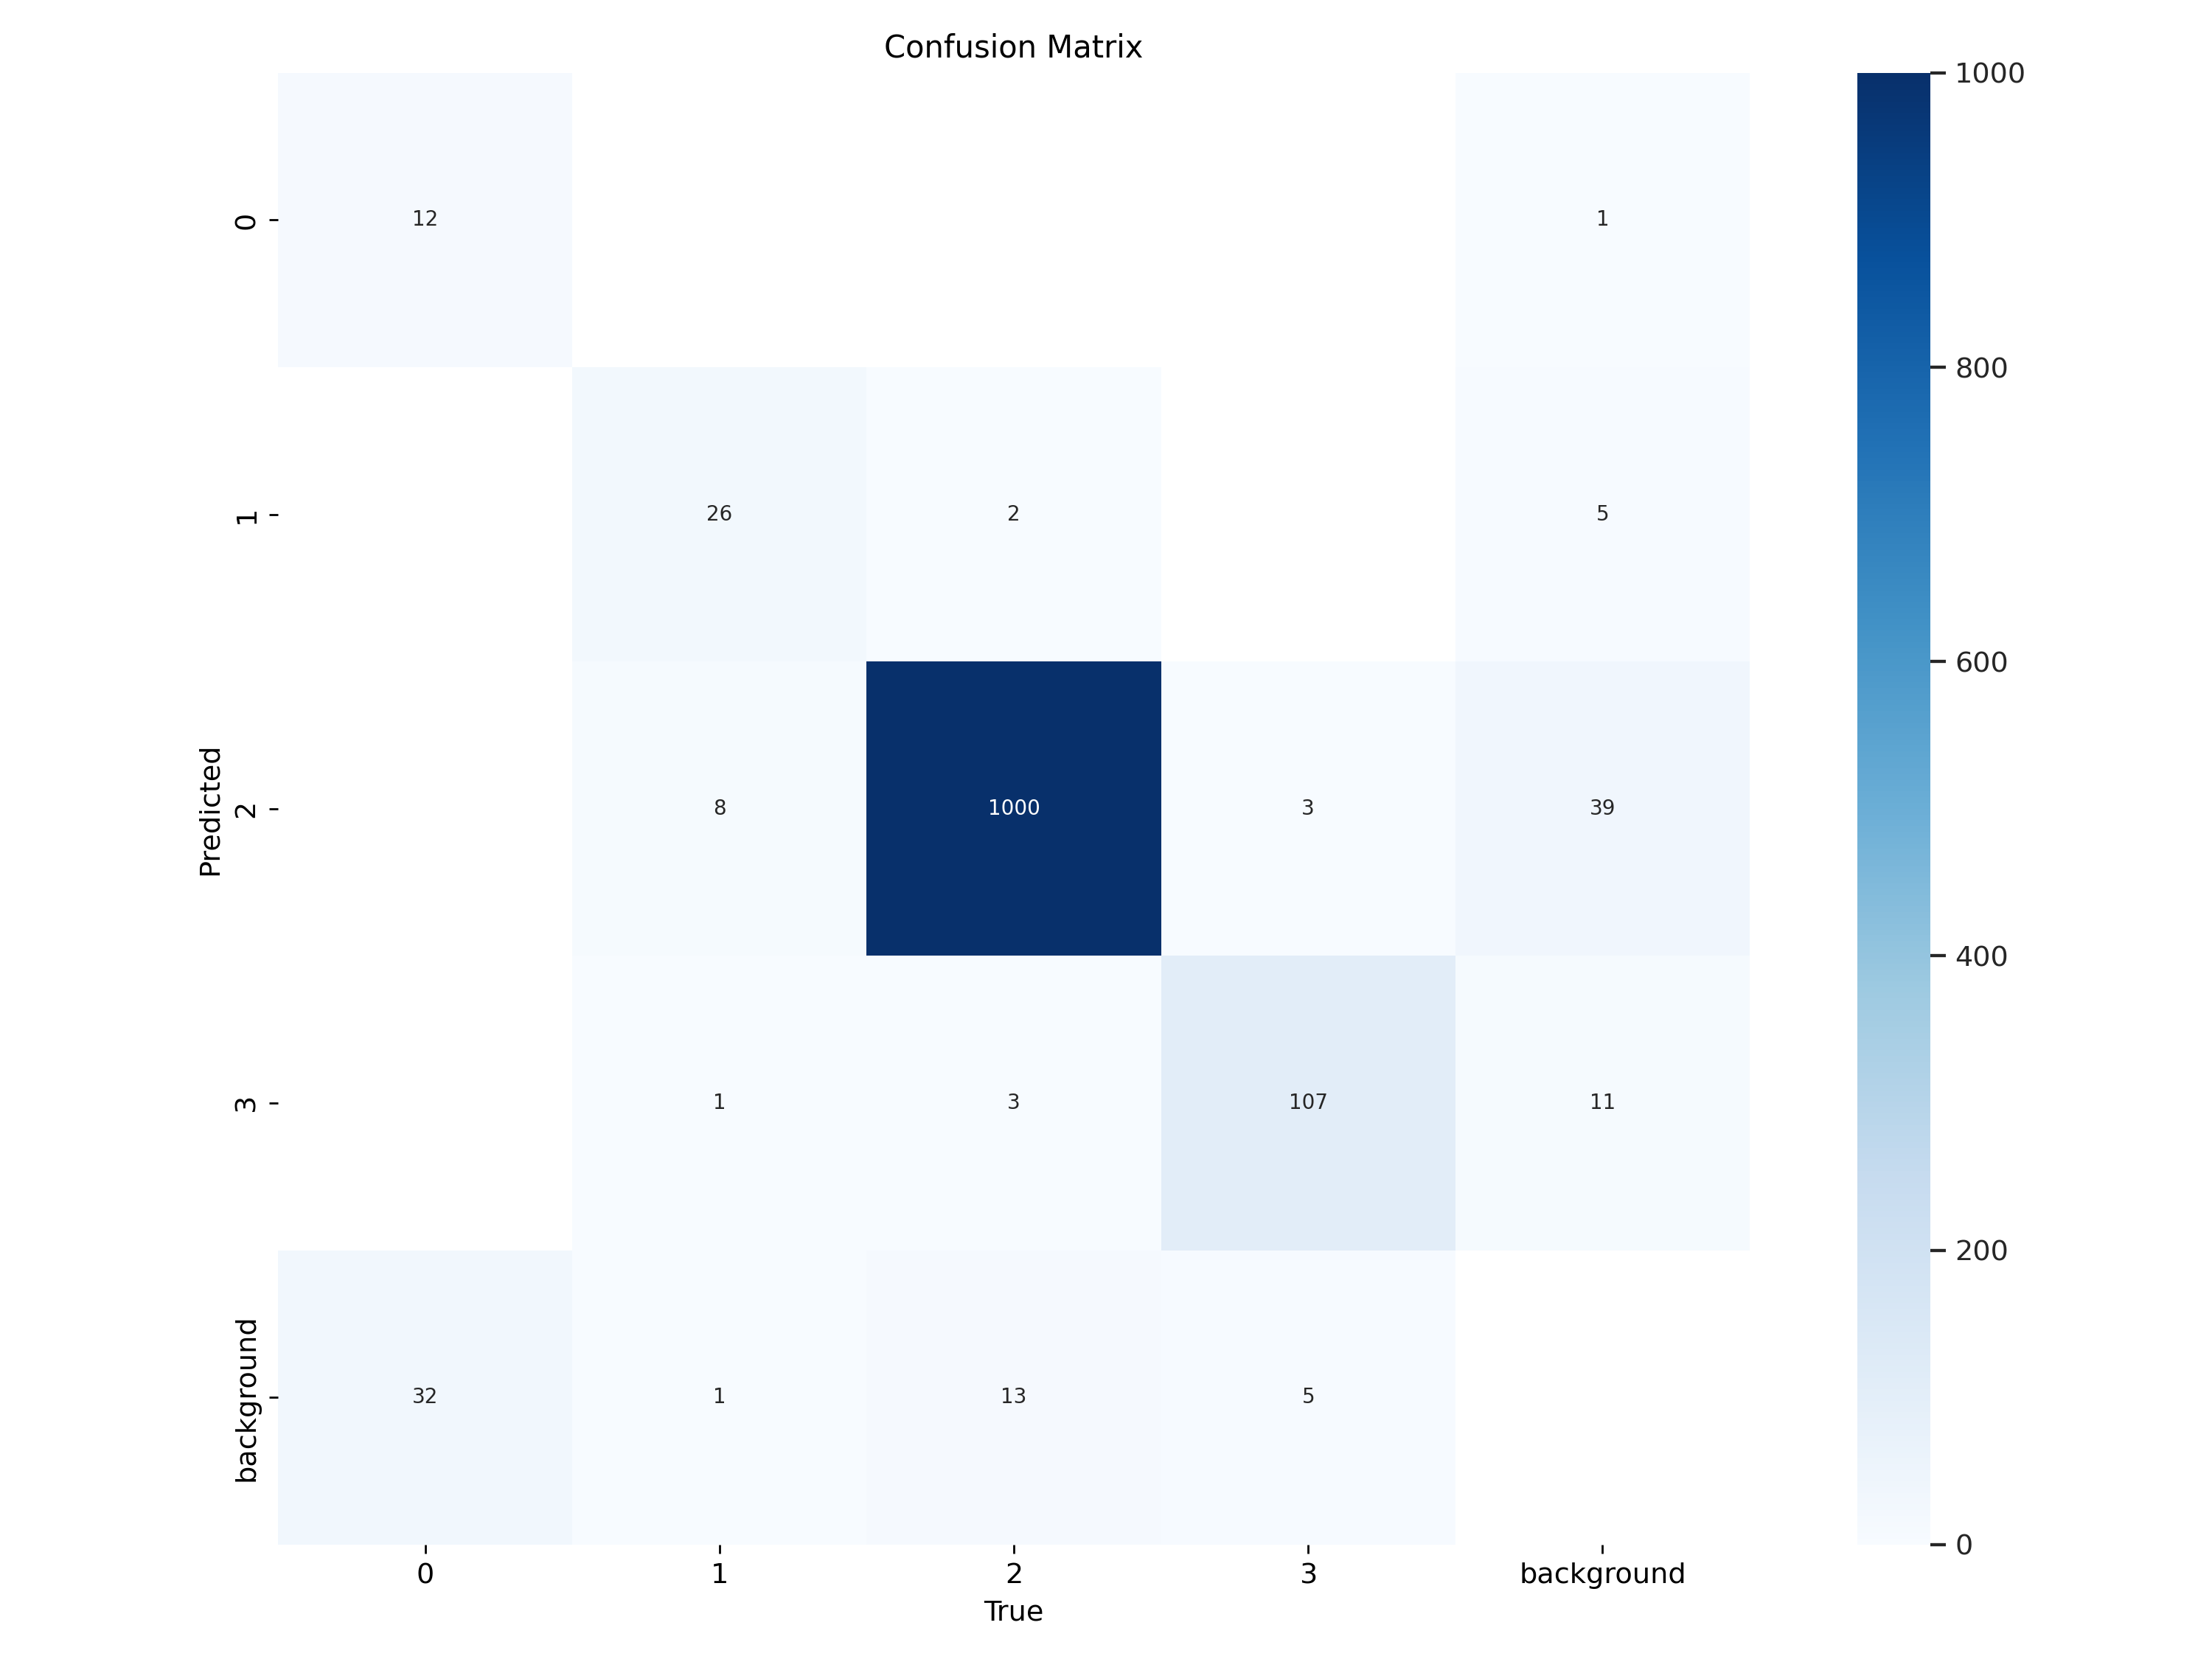

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


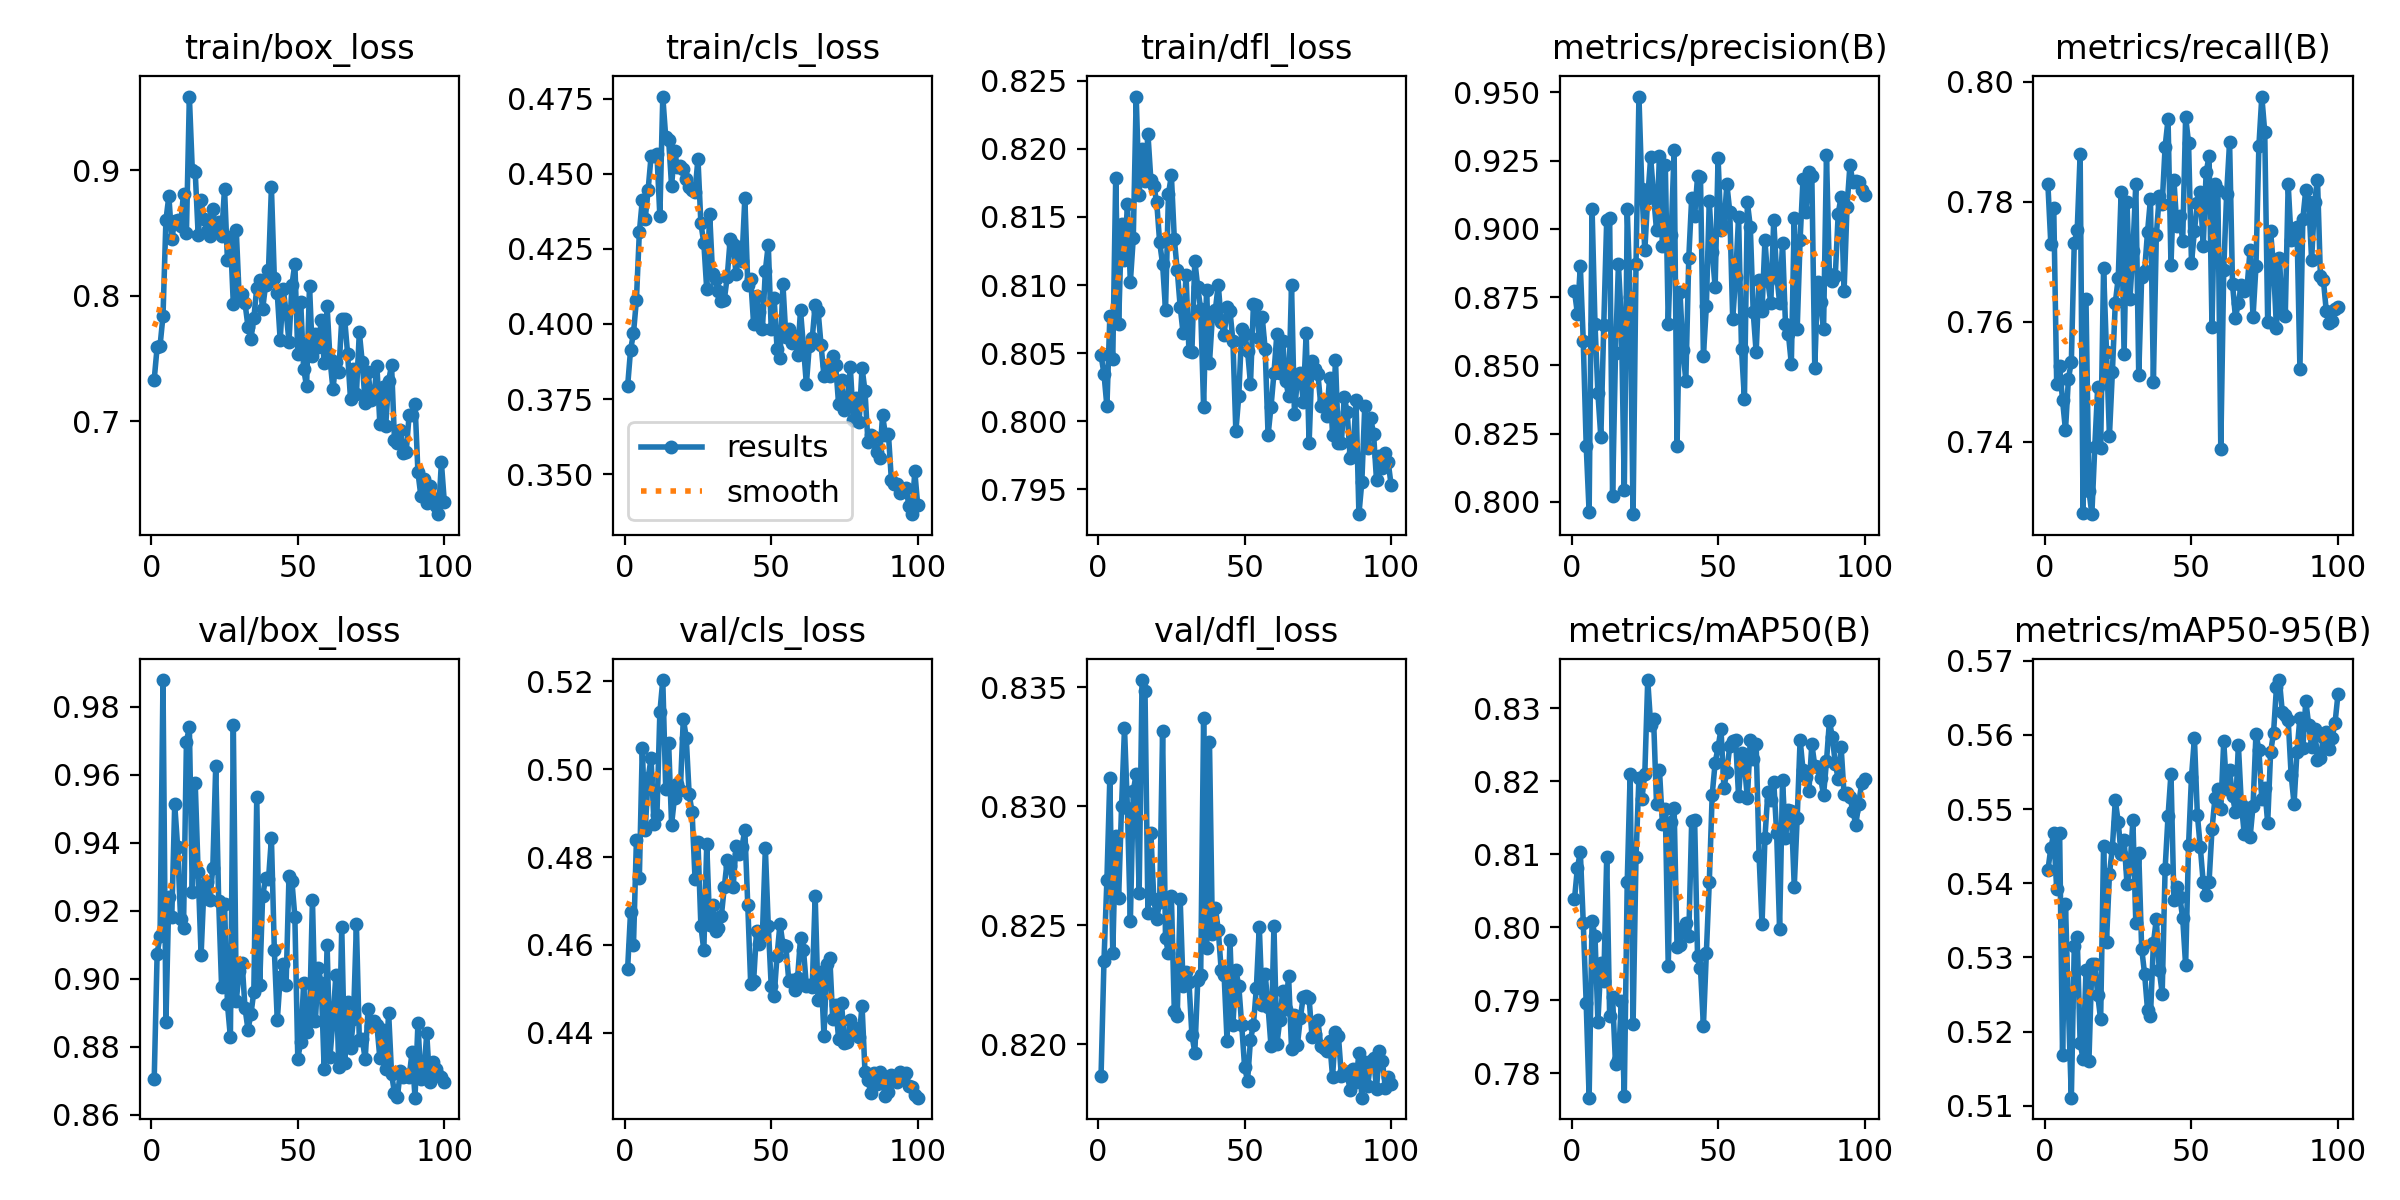

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

/content


FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train3/val_batch0_pred.jpg'

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
100% 755k/755k [00:00<00:00, 14.6MB/s]
val: Scanning /content/datasets/Detecta-objeto--2/valid/labels... 51 images, 0 backgrounds, 0 corrupt: 100% 51/51 [00:00<00:00, 673.28it/s]
val: New cache created: /content/datasets/Detecta-objeto--2/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:48<00:00, 12.21s/it]
                   all         51       1213      0.904      0.758      0.818      0.552
                     0         44         44      0.959      0.318      0.478      0.193
                     1         33         36      0.813      0.833      0.859      0.593
                     2         51       1018      0.953      0.966      0.986      0.758
                     3         50        115       0.89      0.913      0.949      0.662
Sp

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt source=/content/8.mp4

WARNING ⚠️ 'data' argument is missing. Using default 'data=coco8.yaml'.
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/1 [00:01<?, ?it/s]
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 826, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 635, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return fun

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/192 /content/datasets/Tracking-3/test/images/Test-MCI-TOT_mp4-0014_jpg.rf.eb6a5d242b0b27962524a44677c395ee.jpg: 800x800 1 B, 1 G, 20 Js, 22.8ms
image 2/192 /content/datasets/Tracking-3/test/images/Test-MCI-TOT_mp4-0016_jpg.rf.11e8fc6a899f713961a4ff2718aba07e.jpg: 800x800 1 G, 20 Js, 22.9ms
image 3/192 /content/datasets/Tracking-3/test/images/Test-MCI-TOT_mp4-0023_jpg.rf.378876e8f30747fa9aa24d50fac417af.jpg: 800x800 1 G, 20 Js, 22.8ms
image 4/192 /content/datasets/Tracking-3/test/images/Test-MCI-TOT_mp4-0025_jpg.rf.83f44a738aae04ff05112bdba7505be1.jpg: 800x800 1 G, 20 Js, 22.8ms
image 5/192 /content/datasets/Tracking-3/test/images/Test-MCI-TOT_mp4-0026_jpg.rf.1be89df1692e03ec36e39e2b9b78304a.jpg: 800x800 1 G, 20 Js, 22.8ms
image 6/192 /content/datasets/Tracking-3/test/images/Test-MCI-TOT_mp4-0030_jpg.rf.03e

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

---------------
----------
---------------

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train2/")

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


View the status of your deployment at: https://app.roboflow.com/gabriel-mancini-hmmua/tracking-mdolj/2
Share your model with the world at: https://universe.roboflow.com/gabriel-mancini-hmmua/tracking-mdolj/model/2


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

Usando em Vídeo

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/video/8.mp4 save=True

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/8.mp4 save=True

A saída de streaming foi truncada nas últimas 5000 linhas.
video 1/1 (frame 2397/7393) /content/8.mp4: 384x640 (no detections), 9.3ms
video 1/1 (frame 2398/7393) /content/8.mp4: 384x640 (no detections), 12.6ms
video 1/1 (frame 2399/7393) /content/8.mp4: 384x640 (no detections), 9.4ms
video 1/1 (frame 2400/7393) /content/8.mp4: 384x640 (no detections), 9.3ms
video 1/1 (frame 2401/7393) /content/8.mp4: 384x640 (no detections), 9.3ms
video 1/1 (frame 2402/7393) /content/8.mp4: 384x640 (no detections), 9.3ms
video 1/1 (frame 2403/7393) /content/8.mp4: 384x640 (no detections), 9.3ms
video 1/1 (frame 2404/7393) /content/8.mp4: 384x640 (no detections), 9.3ms
video 1/1 (frame 2405/7393) /content/8.mp4: 384x640 (no detections), 9.3ms
video 1/1 (frame 2406/7393) /content/8.mp4: 384x640 (no detections), 9.3ms
video 1/1 (frame 2407/7393) /content/8.mp4: 384x640 (no detections), 9.3ms
video 1/1 (frame 2408/7393) /content/8.mp4: 384x640 (no detections), 9.3ms
video 1/1 (frame 2409/7393) /content/8.m

In [ ]:
!yolo task=detect mode=predict model=/content/best.pt conf=0.25 source=/content/datasets/Tracking-3/test/images/Test-MCI-TOT_mp4-0016_jpg.rf.11e8fc6a899f713961a4ff2718aba07e.jpg save=True

Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 9,828,825 parameters, 0 gradients, 23.3 GFLOPs

image 1/1 /content/datasets/Tracking-3/test/images/Test-MCI-TOT_mp4-0016_jpg.rf.11e8fc6a899f713961a4ff2718aba07e.jpg: 640x640 1 G, 20 Js, 15.1ms
Speed: 3.1ms preprocess, 15.1ms inference, 614.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## COntinuando Treinamento

In [ ]:
!yolo task=detect mode=train model=/content/last.pt data={dataset.location}/data.yaml imgsz=800 epochs=100


Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/last.pt, data=/content/datasets/Tracking-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

In [ ]:
!yolo task=detect mode=train model=/content/runs/detect/train2/weights/last.pt data={dataset.location}/data.yaml epochs=100


Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train2/weights/last.pt, data=/content/datasets/Tracking-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

**NOTE:** Let's take a look at few results.